In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# задача 2

In [7]:
H0 = 5.
R = 30.
e = 0.01
mu = 0.7
g = 9.81

In [35]:
def Q(mu, e, h ,g):
    return mu * e * np.sqrt(2 * g) * h ** (3/2) * 2/3

In [30]:
tau = 0.01

In [58]:
h_t = H0
target = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 1.])
t = 0
hs = []
sec_in_days = 24 * 60 * 60
iters = int(sec_in_days / tau)
dt = int(60 / tau)
for i in range(iters):
    Q_t = Q(mu, e, h_t, g)
    h_t = h_t - Q_t * tau / (np.pi * R ** 2)
    if (i % dt == 0):
        hs.append(h_t)
    if (1 - h_t / H0) > target[t]:
        print(i * tau / sec_in_days)
        t += 1
    if t == 5:
        break
        
hs = np.array(hs)

0.0765957175925926
0.16713761574074074
0.2764461805555556
0.4120519675925926
0.5865318287037037


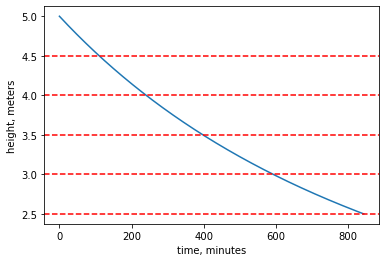

In [63]:
plt.plot(range(hs.shape[0]), hs)
plt.xlabel('time, minutes')
plt.ylabel('height, meters')
for tar in target[:-1]:
    plt.axhline(H0 * (1 - tar), c='r', linestyle='--')

# задача 4

In [23]:
data = pd.DataFrame({
    'A': [88,54,73,64,59,52,58,49], 
    'B': [89,69,78,61,64,50,57,48],
    'C': [91,58,79,60,61,58,59,57],
    'D': [87,68,70,69,64,49,56,47],
    'E': [92,74,76,68,67,50,58,49],
    'F': [86,85,81,79,80,77,76,79],
    'G': [89,88,75,74,73,72,70,71],
    'H': [80,88,78,70,68,67,66,67],
    'I': [90,89,87,56,62,57,45,50],
    'J': [93,91,88,89,88,87,90,86]
                    }, index=range(1,9))

In [24]:
data

,A,B,C,D,E,F,G,H,I,J
1,88,89,91,87,92,86,89,80,90,93
2,54,69,58,68,74,85,88,88,89,91
3,73,78,79,70,76,81,75,78,87,88
4,64,61,60,69,68,79,74,70,56,89
5,59,64,61,64,67,80,73,68,62,88
6,52,50,58,49,50,77,72,67,57,87
7,58,57,59,56,58,76,70,66,45,90
8,49,48,57,47,49,79,71,67,50,86


## Жадный на ставку алгоритм 

In [59]:
def order_compose(arr, items, bidders):
    k_i = len(items)
    k_b = len(bidders)
    res = []
    for i in arr:
        res.append((bidders[i // k_i], items[i % k_i]))
    return res

In [67]:
def greedy_combinator(q, items, bidders, one_get_one=False):
    satisfied = {b: False for b in bidders}
    given = {i: False for i in items}
    res = []
    for order in q:
        decision = not given[order[1]]
        if one_get_one:
            decision = decision and not satisfied[order[0]]
        if decision:
            res.append(order)
            given[order[1]] = True
            satisfied[order[0]] = True
    return res

In [75]:
def get_sum(data, orders):
    s = 0
    for o in orders:
        s += data.loc[o]
    return s

In [126]:
def form_final_check(bidders, order):
    res = {b: [] for b in bidders}
    for bidder, item in order:
        res[bidder].append(item)
    for b in bidders:
        res[b] = sorted(res[b])
    return res

In [127]:
def attempt1(data, one_to_one=False):
    orders = data.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data.columns, data.index)
    ans = greedy_combinator(queue, data.columns, data.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [130]:
print(*attempt1(data, True))

{1: ['J'], 2: ['I'], 3: ['F'], 4: ['G'], 5: ['H'], 6: ['A'], 7: ['C'], 8: ['E']} 565


## Жадный на (ставка/ср. цена вещи или её корень) алгоритм 

In [84]:
data_norm = data.copy()
data_norm

,A,B,C,D,E,F,G,H,I,J
1,88,89,91,87,92,86,89,80,90,93
2,54,69,58,68,74,85,88,88,89,91
3,73,78,79,70,76,81,75,78,87,88
4,64,61,60,69,68,79,74,70,56,89
5,59,64,61,64,67,80,73,68,62,88
6,52,50,58,49,50,77,72,67,57,87
7,58,57,59,56,58,76,70,66,45,90
8,49,48,57,47,49,79,71,67,50,86


In [89]:
data_norm.mean()

A    1.0
B    1.0
C    1.0
D    1.0
E    1.0
F    1.0
G    1.0
H    1.0
I    1.0
J    1.0
dtype: float64

In [88]:
data_norm = data_norm / data_norm.mean()
data_norm

,A,B,C,D,E,F,G,H,I,J
1,1.416499,1.379845,1.391969,1.364706,1.378277,1.069984,1.163399,1.095890,1.343284,1.044944
2,0.869215,1.069767,0.887189,1.066667,1.108614,1.057543,1.150327,1.205479,1.328358,1.022472
3,1.175050,1.209302,1.208413,1.098039,1.138577,1.007776,0.980392,1.068493,1.298507,0.988764
4,1.030181,0.945736,0.917782,1.082353,1.018727,0.982893,0.967320,0.958904,0.835821,1.000000
5,0.949698,0.992248,0.933078,1.003922,1.003745,0.995334,0.954248,0.931507,0.925373,0.988764
6,0.837022,0.775194,0.887189,0.768627,0.749064,0.958009,0.941176,0.917808,0.850746,0.977528
7,0.933602,0.883721,0.902486,0.878431,0.868914,0.945568,0.915033,0.904110,0.671642,1.011236
8,0.788732,0.744186,0.871893,0.737255,0.734082,0.982893,0.928105,0.917808,0.746269,0.966292


In [128]:
def attempt2(data, one_to_one=False):
    data_norm = data.copy()
    data_norm = data_norm / data_norm.mean()
    orders = data_norm.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data_norm.columns, data_norm.index)
    ans = greedy_combinator(queue, data_norm.columns, data_norm.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [131]:
print(*attempt2(data, True))

{1: ['A'], 2: ['I'], 3: ['B'], 4: ['D'], 5: ['E'], 6: ['G'], 7: ['J'], 8: ['F']} 632


In [129]:
def attempt3(data, one_to_one=False):
    data_norm = data.copy()
    data_norm = data_norm / np.sqrt(data_norm.mean())
    orders = data_norm.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data_norm.columns, data_norm.index)
    ans = greedy_combinator(queue, data_norm.columns, data_norm.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [148]:
print(*attempt3(data, True), sep='\n\n')

{1: ['E'], 2: ['I'], 3: ['C'], 4: ['D'], 5: ['F'], 6: ['G'], 7: ['J'], 8: ['H']}

638


## Новые данные

In [105]:
data2 = pd.read_csv('data_1.csv', index_col='id', nrows=17).T
data2

id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,R
1,100,139,178,158,149,148,220,188,179,168,199,209,130,178,170,269,190
2,110,129,179,150,211,218,180,179,178,238,240,250,179,120,139,212,210
3,119,212,138,181,148,210,178,159,227,200,190,220,140,160,150,222,210
4,120,190,208,199,120,137,198,261,170,201,168,237,189,150,160,268,189
5,140,159,149,169,177,159,190,199,189,110,129,197,148,169,178,247,218
6,130,151,188,199,161,169,171,208,179,138,160,188,179,149,201,259,220
7,100,170,169,207,181,160,199,170,200,141,178,179,170,140,178,216,197


In [155]:
order3, s3 = attempt3(data2)
print(*order3.items(), '\n', s3, sep='\n')

('1', ['G', 'N', 'P'])
('2', ['E', 'F', 'J', 'K', 'L'])
('3', ['B', 'I'])
('4', ['C', 'H', 'M'])
('5', ['A'])
('6', ['O', 'R'])
('7', ['D'])


3689


In [134]:
order1

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [135]:
order2

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [136]:
order3

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [137]:
data3 = pd.read_csv('data_2.csv', index_col='id', nrows=18).T
data3

id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,R,S
1,100,139,177,161,151,150,220,189,178,168,198,209,129,179,167,269,189,188
2,110,128,180,150,210,220,181,178,181,239,241,246,181,119,138,209,210,168
3,119,208,139,181,150,207,180,159,231,198,190,221,139,160,148,219,208,181
4,119,190,210,198,121,140,199,258,169,199,168,240,187,149,159,268,190,227
5,138,159,147,168,178,157,190,199,191,110,130,201,148,168,180,250,219,221
6,130,150,188,198,158,168,169,210,178,138,159,188,180,150,199,257,220,199
7,100,169,170,208,179,159,200,168,198,138,178,178,170,139,177,221,198,228


In [156]:
order6, s6 = attempt3(data3)
print(*order6.items(), '\n', s6, sep='\n')

('1', ['G', 'N', 'P'])
('2', ['E', 'F', 'J', 'K', 'L'])
('3', ['B', 'I'])
('4', ['C', 'H', 'M'])
('5', ['A'])
('6', ['O', 'R'])
('7', ['D', 'S'])


3911


In [141]:
order4, s4 = attempt1(data3)
order5, s5 = attempt2(data3)
order6, s6 = attempt3(data3)
print(f'{s4} vs. {s5} vs. {s6}')

3911 vs. 3911 vs. 3911


In [142]:
order4

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}

In [143]:
order5

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}

In [144]:
order6

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}

# Задача 3

In [2]:
data_train = pd.read_csv('train.csv')
data_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,Y1,Y2
0,32.0,60.0,15.0,1871,56.0,6.0,10.0,0.0,58653.95,176.4,...,175.0,311667.0,154.27,18.48,27338.4,99.9,74199.0,1002.69,0,1252.25
1,14.0,7.0,2.0,585,2.0,2.0,4.0,2.0,34613.83,848.0,...,559.0,1497992.0,109.64,1.54,17209.5,112.9,-7194.0,-97.22,0,418.14
2,42.0,131.0,32.0,3369,102.0,15.0,38.0,15.0,36801.25,719.6,...,579.5,1207875.0,251.65,7.39,15966.3,99.3,19263.0,260.31,0,480.15
3,48.0,89.0,14.0,2630,183.0,20.0,1.0,1.0,37973.60,732.0,...,500.2,1098257.0,229.92,10.30,17529.3,94.9,64773.0,875.31,0,544.36
4,14.0,49.0,3.0,698,55.0,2.0,9.0,3.0,33297.72,149.8,...,122.7,269984.0,87.40,1.61,17571.8,96.7,2268.0,30.65,0,448.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,135.0,154.0,33.0,6216,447.0,48.0,114.0,10.0,49722.15,815.6,...,515.7,1082662.0,102.36,9.80,20201.0,126.9,28204.0,381.14,0,771.30
64,72.0,234.0,24.0,5516,161.0,34.0,110.0,29.0,58046.47,904.4,...,893.1,1687654.0,545.90,23.07,19799.1,110.6,1265422.0,17100.30,1,1151.50
65,132.0,376.0,81.0,23664,676.0,125.0,159.0,35.0,38877.22,1619.8,...,1349.0,2785836.0,301.91,37.53,17726.7,111.9,175754.0,2375.05,0,627.63
66,90.0,140.0,16.0,9047,387.0,30.0,77.0,15.0,38654.35,800.4,...,619.9,1245619.0,264.48,15.32,17109.5,100.0,30067.0,406.31,0,536.38


### Целевые переменные

In [3]:
data_train['Y1'].unique()

array([0, 1], dtype=int64)

In [4]:
data_train['Y2'].unique()

array([1252.25,  418.14,  480.15,  544.36,  448.2 ,  421.25, 1025.95,
        856.94,  522.99,  646.67,  475.7 ,  513.42,  514.49,  562.8 ,
       1763.28,  559.31,  622.86,  543.33,  734.03,  501.2 ,  807.04,
        654.2 , 1020.21,  515.48,  455.26, 1567.39,  550.41, 1505.33,
        422.03,  543.04,  442.28,  472.82,  528.74,  678.28,  753.65,
        610.51,  465.42,  676.2 ,  593.14,  469.28,  440.57,  477.79,
        533.42,  521.13,  709.64,  501.22, 1465.68, 1115.61,  486.36,
        553.44,  799.83,  653.34,  587.52,  682.18,  434.86,  481.53,
        480.78,  556.24, 1285.84,  509.57,  558.09,  800.64,  604.18,
        771.3 , 1151.5 ,  627.63,  536.38,  478.24])

### Удаление объектов c NaN

In [5]:
data_train.loc[data_train.notna().all(axis=1)]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,Y1,Y2
0,32.0,60.0,15.0,1871,56.0,6.0,10.0,0.0,58653.95,176.4,...,175.0,311667.0,154.27,18.48,27338.4,99.9,74199.0,1002.69,0,1252.25
1,14.0,7.0,2.0,585,2.0,2.0,4.0,2.0,34613.83,848.0,...,559.0,1497992.0,109.64,1.54,17209.5,112.9,-7194.0,-97.22,0,418.14
2,42.0,131.0,32.0,3369,102.0,15.0,38.0,15.0,36801.25,719.6,...,579.5,1207875.0,251.65,7.39,15966.3,99.3,19263.0,260.31,0,480.15
3,48.0,89.0,14.0,2630,183.0,20.0,1.0,1.0,37973.60,732.0,...,500.2,1098257.0,229.92,10.30,17529.3,94.9,64773.0,875.31,0,544.36
4,14.0,49.0,3.0,698,55.0,2.0,9.0,3.0,33297.72,149.8,...,122.7,269984.0,87.40,1.61,17571.8,96.7,2268.0,30.65,0,448.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,135.0,154.0,33.0,6216,447.0,48.0,114.0,10.0,49722.15,815.6,...,515.7,1082662.0,102.36,9.80,20201.0,126.9,28204.0,381.14,0,771.30
64,72.0,234.0,24.0,5516,161.0,34.0,110.0,29.0,58046.47,904.4,...,893.1,1687654.0,545.90,23.07,19799.1,110.6,1265422.0,17100.30,1,1151.50
65,132.0,376.0,81.0,23664,676.0,125.0,159.0,35.0,38877.22,1619.8,...,1349.0,2785836.0,301.91,37.53,17726.7,111.9,175754.0,2375.05,0,627.63
66,90.0,140.0,16.0,9047,387.0,30.0,77.0,15.0,38654.35,800.4,...,619.9,1245619.0,264.48,15.32,17109.5,100.0,30067.0,406.31,0,536.38


In [6]:
data_train.dropna(axis=0, inplace=True)

In [7]:
data_train.shape

(62, 66)

Преобразуем все object

In [8]:
data_train.dtypes.value_counts()

float64    63
object      2
int64       1
dtype: int64

In [9]:
data_train.columns[data_train.dtypes == object]

Index(['x4', 'x59'], dtype='object')

In [10]:
data_train['x4'].unique()

array(['1871', '585', '3369', '2630', '698', '1600', '24523', '1265',
       '5638', '2536', '3589', '15943', '19823', '190', '6391', '5102',
       '10782', '4 379', '20265', '3973', '8046', '3918', '1687', '14067',
       '245', '4619', '14561', '2744', '9854', '14654', '14395', '2268',
       '1114', '6001', '2765', '1606', '4407', '4318', '10342', '12421',
       '11641', '634', '3384', '28899', '7071', '20417', '25448', '5382',
       '1553', '1290', '3956', '14412', '192', '5579', '5588', '8347',
       '3142', '6216', '5516', '23664', '9047', '6886'], dtype=object)

In [11]:
data_train['x4'] = data_train['x4'].apply(lambda x: int(x.replace(' ', '')))

In [12]:
data_train['x59'].unique()

array(['154.27', '109.64', '251.65', '229.92', '87.40', '78.80', '575.39',
       '558.57', '294.96', '115.76', '145.05', '207.52', '174.72',
       '37.23', '308.59', '178.44', '340.48', '158.84', '466.79',
       '197.23', '188.36', '129.25', '202.30', '210.42', '70.44',
       '467.32', '229.14', '243.93', '245.76', '510.77', '402.39',
       '325.82', '258.95', '285.49', '399.13', '77.13', '177.47',
       '139.72', '211.23', '315.60', '195.38', '105.69', '139.12',
       '230.68', '141.46', '150.91', '412.95', '366.17', '32.50',
       '223.21', '375.21', '557.04', '518.56', '203.50', '453.25',
       '131.34', '356.34', '102.36', '545.90', '301.91', '264.48',
       '272.25'], dtype=object)

In [13]:
data_train['x59'] = data_train['x59'].apply(lambda x: float(x.replace(' ', '')))

In [14]:
data_train['x59']

0     154.27
1     109.64
2     251.65
3     229.92
4      87.40
       ...  
63    102.36
64    545.90
65    301.91
66    264.48
67    272.25
Name: x59, Length: 62, dtype: float64

In [15]:
data_train.dtypes.value_counts()

float64    64
int64       2
dtype: int64

### Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
data_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,Y1,Y2
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,6.200000e+01,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000
mean,80.612903,194.887097,38.290323,7539.483871,346.435484,45.322581,74.419355,15.209677,40677.564355,920.877419,...,759.879032,1.609910e+06,255.517419,17.765645,18381.130645,108.177419,2.024381e+05,2735.649839,0.145161,661.923710
std,67.868328,184.966378,36.382480,7102.533265,353.838836,50.316303,67.528148,19.314597,7745.359007,744.139284,...,687.743176,1.421923e+06,141.915639,20.603440,2801.080544,13.576322,3.028617e+05,4092.725508,0.355139,291.224762
min,5.000000,7.000000,1.000000,190.000000,1.000000,0.000000,1.000000,0.000000,29918.620000,84.000000,...,21.600000,4.438900e+04,32.500000,0.320000,15364.800000,79.800000,-7.194000e+03,-97.220000,0.000000,418.140000
25%,31.250000,70.250000,11.500000,2559.500000,108.250000,14.250000,26.000000,3.000000,36442.885000,445.950000,...,347.675000,7.443892e+05,146.515000,7.165000,16744.475000,99.500000,2.643175e+04,357.185000,0.000000,480.967500
50%,56.000000,137.500000,26.000000,5242.000000,288.500000,30.000000,52.500000,10.000000,38519.285000,750.300000,...,551.550000,1.113224e+06,226.175000,13.215000,17545.250000,109.400000,7.614300e+04,1028.960000,0.000000,551.925000
75%,116.000000,236.000000,55.750000,10672.000000,433.500000,61.000000,114.750000,17.750000,40761.050000,1176.650000,...,1028.625000,2.214935e+06,336.815000,21.392500,18805.400000,114.275000,2.844662e+05,3844.137500,0.000000,681.205000
max,324.000000,830.000000,192.000000,28899.000000,1879.000000,281.000000,319.000000,115.000000,66456.570000,3950.200000,...,3998.900000,7.708499e+06,575.390000,144.910000,30242.100000,167.500000,1.474756e+06,19929.140000,1.000000,1763.280000


In [18]:
Norm_x = StandardScaler()
Norm_y = StandardScaler()
train_X_reg = Norm_x.fit_transform(data_train.drop(['Y1', 'Y2'], axis=1))
train_X_class = train_X_reg.copy()
train_Y_reg = Norm_y.fit_transform(data_train[['Y2']])
train_Y_class = data_train['Y1']

### Простое дублирование

In [19]:
data_train['Y1'].value_counts()

0    53
1     9
Name: Y1, dtype: int64

<AxesSubplot:>

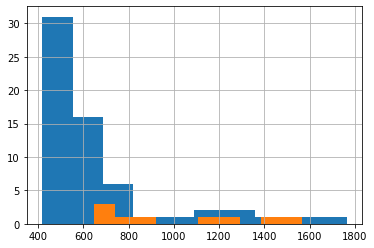

In [20]:
data_train['Y2'].hist()
data_train['Y2'][data_train['Y1']==1].hist()

In [21]:
pack_for_mpX = train_X_class[train_Y_class == 1].copy()
pack_for_mpY1 = train_Y_class[train_Y_class == 1].copy()

In [22]:
train_X_class.shape

(62, 64)

In [23]:
train_Y_class.value_counts()

0    53
1     9
Name: Y1, dtype: int64

In [30]:
train_X_class = np.append(train_X_class, pack_for_mpX, axis=0)
train_Y_class = np.append(train_Y_class, pack_for_mpY1, axis=0)
print(train_X_class.shape)

(125, 64)


### SMOTE (для регрессии)

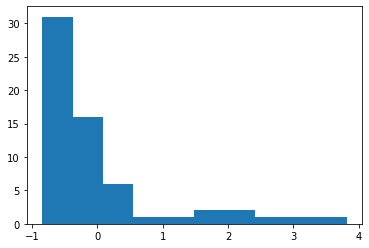

In [297]:
plt.hist(train_Y_reg);

In [311]:
from imblearn.over_sampling import SMOTENC

In [315]:
train_X_reg

array([[-0.72212991, -0.73520515, -0.64537797, ..., -0.61467244,
        -0.42688135, -0.42688098],
       [-0.98951444, -1.02408285, -1.00560972, ...,  0.35069386,
        -0.6978217 , -0.69782244],
       [-0.57358295, -0.34821806, -0.17430568, ..., -0.65922781,
        -0.60975185, -0.60975187],
       ...,
       [ 0.76333971,  0.98715995,  1.1834909 , ...,  0.27643492,
        -0.08882591, -0.08882676],
       [ 0.13944247, -0.29916336, -0.61766784, ..., -0.60724655,
        -0.57378759, -0.57378761],
       [-0.54387356, -0.33731701, -0.28514622, ...,  0.25415723,
        -0.57376096, -0.57376051]])

In [341]:
sm = SMOTE(categorical_features = [], random_state=42)
train_X_reg, train_Y_reg = sm.fit_resample(train_X_reg, train_Y_reg)

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

## Обучение

In [49]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, r2_score
from sklearn.tree import plot_tree

def Result(y_true1, y_pred1, y_true2, y_pred2):
    F1_part = 0.3 * f1_score(y_true1, y_pred1)
    R2_part = 0.7 * r2_score(y_true2, y_pred2)
    return round(25 * max(0, F1_part + R2_part)), F1_part, R2_part

In [32]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_X_class, train_Y_class, test_size=0.25)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_X_reg, train_Y_reg, test_size=0.25)

### Y1

In [33]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

LogisticRegression()

In [34]:
model1 = RandomForestClassifier(n_estimators=50, max_depth=5)
model1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [35]:
model1.score(X_test1, y_test1)

0.96875

In [36]:
f1_score(y_test1, model1.predict(X_test1))

0.9767441860465117

### Y2

In [37]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [51]:
model2 = RandomForestRegressor(n_estimators=50, max_depth=5)
model2.fit(X_train2, y_train2)

<ipython-input-51-0c8dfc1526be>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train2, y_train2)


RandomForestRegressor(max_depth=5, n_estimators=50)

In [52]:
Result(y_train1, model1.predict(X_train1), y_train2, model2.predict(X_train2))

(24, 0.3, 0.6784657004900158)

## Итоговая оценка тренировочной выборки

In [53]:
Result(y_test1, model1.predict(X_test1), y_test2, model2.predict(X_test2))

(23, 0.2930232558139535, 0.6254212834080907)

In [54]:
data_test = pd.read_csv('test.csv')

In [55]:
data_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,132.0,473.0,57.0,12201,461.0,78.0,85.0,17.0,40450.05,1032.4,...,-310.0,9.15,960.6,1877844.0,120.69,12.55,20830.5,75.0,225557.0,3048.07
1,51.0,125.0,26.0,4734,166.0,22.0,77.0,1.0,39120.38,998.2,...,6436.0,7.72,794.5,1541259.0,175.28,13.76,16022.7,108.6,935400.0,12640.54
2,236.0,672.0,164.0,17540,671.0,89.0,180.0,26.0,42361.80,1650.0,...,11896.0,9.96,1410.6,2855899.0,201.41,15.28,18681.1,106.0,1123004.0,15175.73
3,73.0,186.0,20.0,6931,262.0,31.0,74.0,6.0,41227.90,721.8,...,-885.0,8.83,530.5,1151042.0,402.10,12.29,18625.2,98.7,712351.0,9626.36
4,58.0,104.0,12.0,4851,350.0,27.0,67.0,13.0,37321.88,580.4,...,1410.0,6.56,456.2,921127.0,185.09,9.70,17259.5,82.0,44377.0,599.69
5,39.0,110.0,12.0,2604,94.0,21.0,21.0,12.0,52172.70,318.2,...,705.0,11.22,260.7,485621.0,143.96,15.82,21532.6,89.4,403023.0,5446.26
6,29.0,63.0,7.0,2577,153.0,16.0,16.0,10.0,38307.22,519.0,...,-969.0,7.28,333.7,724686.0,311.61,5.70,15755.2,107.1,48430.0,654.46
7,58.0,101.0,21.0,5852,421.0,25.0,66.0,17.0,48604.38,456.2,...,1323.0,8.28,275.5,609071.0,145.57,6.43,19293.9,108.0,142046.0,1919.54
8,49.0,111.0,26.0,4498,263.0,38.0,60.0,16.0,37751.68,615.0,...,2680.0,7.33,502.3,987032.0,240.02,9.49,17277.4,100.3,13287.0,179.55
9,40.0,125.0,22.0,3736,182.0,17.0,64.0,5.0,39021.40,300.4,...,-432.0,9.85,238.3,532036.0,207.97,1.77,18009.7,105.2,46958.0,634.57


In [56]:
data_test.dtypes

x1     float64
x2     float64
x3     float64
x4       int64
x5     float64
        ...   
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
Length: 64, dtype: object

In [57]:
data_test = Norm_x.transform(data_test)

In [58]:
final_pred1 = model1.predict(data_test)

In [59]:
final_pred2 = model2.predict(data_test)

In [60]:
data_pred = pd.DataFrame({'Y1': final_pred1, 'Y2':Norm_y.inverse_transform(final_pred2.reshape(1,-1)[0])})

In [61]:
data_pred.to_csv('res.csv', index=False)

In [379]:
final_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [380]:
final_pred2.reshape(1,-1)[0]

array([ 0.57972363, -0.00443296, -0.13546767, -0.7043172 , -0.26919361,
        0.98256306, -0.60946825,  0.574905  , -0.50863993,  0.05802142,
       -0.91763868, -1.05333192,  0.02261551, -0.91358057, -0.20336466,
       -0.61792334, -0.32648032])

In [381]:
Norm_y.inverse_transform(final_pred2.reshape(1,-1)[0])

array([829.38652044, 660.64317627, 622.79162144, 458.46997426,
       584.16265877, 945.75338752, 485.86867072, 827.99457765,
       514.99460793, 678.68416216, 396.8485195 , 357.65126965,
       668.45657557, 398.02077019, 603.17844586, 483.42627779,
       567.61443926])